In [32]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import json 
from datetime import datetime

In [33]:
#methods: 

#getting messages timestamp_ms as dates:
def get_dates(data,msg_from):
    dates = []
    #looping through the messages array.
    #getting timestamps_ms out and converting then to a readable string.
    #appending them to the dates array. 
    for el in data['messages']:
        if el['sender_name'] == msg_from and el['timestamp_ms']!=None:
            msint = int(el['timestamp_ms'])
            conv_date = datetime.fromtimestamp(msint/1000.0).strftime('%Y-%m-%d')
            dates.append(conv_date)    
    dates.sort()
    return dates

#getting number of messages per day, by counting number of equal dates
def number_of_msgs_npasarray(array):
    number_msgs_per_day = []
    counter = 1
    for i in range(len(array)-2):
        if array[i] != array[i+1]:
            number_msgs_per_day.append(counter)
            counter = 1
        if array[i] == array[i+1]:
            counter += 1
    vector = np.array(number_msgs_per_day)
    return vector

#removing duplicates: 
def rm_duplicates(array):
    rtr_arr = []
    for i in range(len(array)-2):
        if array[i] != array[i+1]:
            rtr_arr.append(array[i])
            
    return rtr_arr

In [34]:
with open('../data/message_1.json') as json_file:
    data = json.load(json_file)


dates_x = get_dates(data,'x')

dates_nima = get_dates(data,'Nima Abdollahi')


In [35]:
#vectors for x:
yVector_x = number_of_msgs_npasarray(dates_x)


#vectores for nima:
yVector_nima = number_of_msgs_npasarray(dates_nima)
x_2 = np.array(range(0,len(yVector_nima)))



In [117]:
#changing dates to datetime objects:
dates_asDatetime_x = [datetime.strptime(d, '%Y-%m-%d') for d in rm_duplicates(dates_x)]
dates_asDatetime_n = [datetime.strptime(d, '%Y-%m-%d') for d in rm_duplicates(dates_nima)]
#mdates: 
month = mdates.MonthLocator()
year = mdates.YearLocator()
date_fmt = mdates.DateFormatter('%b-%Y')


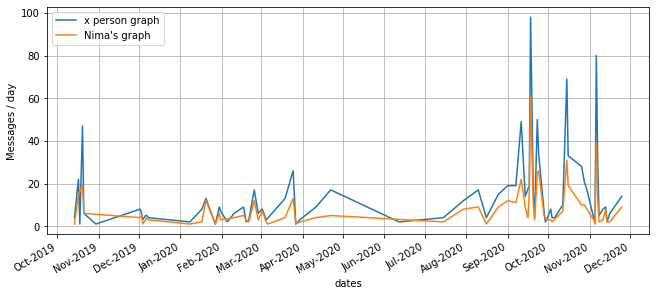

In [138]:
#ploting:
figure, ax = plt.subplots(figsize=(9,4), constrained_layout=True)
line1, = ax.plot(dates_asDatetime_x, yVector_x)
line2, = ax.plot(dates_asDatetime_n,yVector_nima)
ax.xaxis.set_major_formatter(date_fmt)
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_locator(month)
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


ax.legend((line1, line2), ('x person graph','Nima\'s graph'),loc='upper left')


ax.grid(True)
ax.set_ylabel('Messages / day')
ax.set_xlabel('dates')


plt.show()